In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import gaussian_kde

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

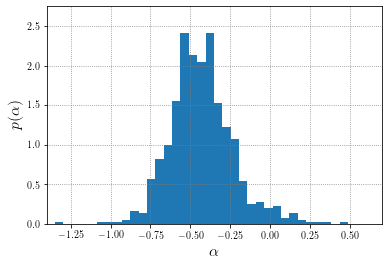

In [54]:
samps = np.load('../results/results_09-16/processed_spin_vs_q_samples_FAR_1_in_1_O3a_r00.npy','r')
mu0s = samps[:,-4]
logsig0s = samps[:,-3]
alphas = samps[:,-2]
betas = samps[:,-1]

fig,ax = plt.subplots()
ax.hist(alphas,density=True,bins=35)

alpha_grid = np.linspace(-1.4,0.7,300)
kde = gaussian_kde(alphas,bw_method=0.75*alphas.size**(-1./5.))
#ax.plot(alpha_grid,kde(alpha_grid),color='black')

ax.axes.grid(True,which='major',color='grey',ls=':')
ax.set_xlabel(r'$\alpha$',fontsize=16)
ax.set_ylabel(r'$p(\alpha)$',fontsize=16)
ax.set_xlim(-1.4,0.7)
ax.set_ylim(0,2.75)
plt.show()

In [55]:
print(np.median(alphas))
print(np.quantile(alphas,0.84)-np.median(alphas))
print(np.median(alphas)-np.quantile(alphas,0.16))

-0.4438875725826659
0.1881899169677379
0.16439726541280614


Text(0, 0.5, '$\\mu_\\chi$')

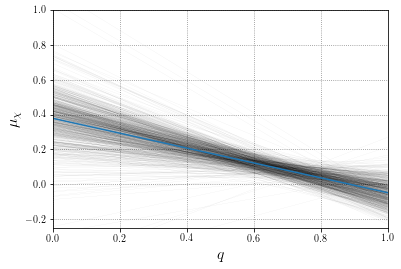

In [52]:
q_grid = np.linspace(0,1,20)
mu_with_qs = np.zeros((mu0s.size,q_grid.size))

fig,ax = plt.subplots()
for i in range(mu0s.size):
    
    mus = mu0s[i] + alphas[i]*(q_grid-1.)
    ax.plot(q_grid,mus,color='black',lw=0.1,alpha=0.2)
    mu_with_qs[i,:] = mus
    
ax.plot(q_grid,np.mean(mu_with_qs,axis=0))
    
ax.set_xlim(0,1)
ax.set_ylim(-0.25,1)
ax.axes.grid(True,which='major',color='grey',ls=':')
ax.set_xlabel(r'$q$',fontsize=16)
ax.set_ylabel(r'$\mu_\chi$',fontsize=16)

Text(0, 0.5, '$\\sigma_\\chi$')

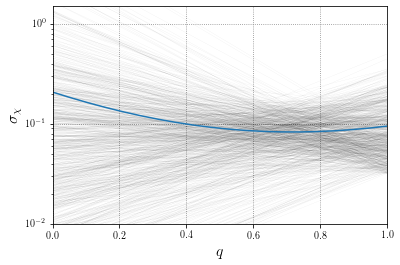

In [56]:
q_grid = np.linspace(0,1,20)
sigs_with_qs = np.zeros((mu0s.size,q_grid.size))

fig,ax = plt.subplots()
for i in range(mu0s.size):
    
    logsigs = logsig0s[i] + betas[i]*(q_grid-1.)
    ax.plot(q_grid,10.**logsigs,color='black',lw=0.1,alpha=0.2)
    sigs_with_qs[i,:] = 10.**logsigs
    
ax.plot(q_grid,np.mean(sigs_with_qs,axis=0))
    
ax.set_yscale('log')
ax.set_ylim(0.01,1.5)
ax.set_xlim(0,1)
ax.axes.grid(True,which='major',color='grey',ls=':')
ax.set_xlabel(r'$q$',fontsize=16)
ax.set_ylabel(r'$\sigma_\chi$',fontsize=16)